# Problem 5.9

In [86]:
# import autograd functionally
import autograd.numpy as np
from autograd.misc.flatten import flatten_func
from autograd import grad as compute_grad

# import various other libraries
import copy
import matplotlib.pyplot as plt

# this is needed to compensate for %matplotl+ib notebook's tendancy lotted inline
from matplotlib import rcParams
rcParams["figure.autolayout"] = True

In [87]:
# gradient descent function
def gradient_descent(g, w ,alpha, max_its, beta):
    # flatten the input function, create gradient based on flat function
    g_flat, unflatten, w = flatten_func(g, w)
    grad = compute_grad(g_flat)

    # record history
    w_hist = []
    # push the first w
    w_hist.append(unflatten(w))

    # start gradient descent loop
    z = np.zeros(np.shape(w))  # momentum term

    # over the line
    for k in range(max_its):
        # plug in value into func and derivative
        grad_eval = grad(w)
        grad_eval.shape = np.shape(w)

        # take descent step with momentum
        z = beta * z + grad_eval
        w = w -alpha * z

        # record weight update
        w_hist.append(unflatten(w))

    return w_hist

# normalize the input data
def normalize(data, data_mean, data_std):
    normalized = (data - data_mean)/data_std
    return normalized
# our predict function
def predict_normalized(x ,w):
    # feature transformations
    f = w[0] + np.dot(x, w[1:])
    return f

def plotting(cost_hist, ylabelName, label):
    figure, axes = plt.subplots(1,1, figsize = (6,5))
    axes.plot(range(len(cost_hist)),cost_hist, label = label, linestyle = "solid")
    axes.set_xlabel("iterations")
    axes.set_ylabel(ylabelName)
    axes.legend()
    plt.show()

In [88]:
csvname = "boston_housing.csv"
data = np.loadtxt(csvname, delimiter = ',')
data = data.T
x = data[:,:-1]
y = data[:,-1:]

# we do the normalization of these data matrix
x_means = np.mean(x, axis = 0)
x_stds = np.std(x, axis = 0)
# normalize the input data
x_normed = normalize(x, x_means, x_stds)

In [89]:
# define least square cost function
least_squares_normalized = lambda w: np.sum((predict_normalized(x_normed, w) - y)**2)
RMSE = lambda w: np.mean((predict_normalized(x_normed, w) - y)**2)**0.5
MAD = lambda w: np.mean(np.abs(predict_normalized(x_normed, w) - y))

In [90]:
# initialize parameters
alpha = 10**-4
max_its = 100
beta = 0
w_init = np.random.randn(x.shape[1]+1, 1)

In [91]:
# run gradient descent, create cost function history
weight_history = gradient_descent(least_squares_normalized, w_init, alpha, max_its,beta)
# use MSE to validate the regression quality
cost_history = [RMSE(v) for v in weight_history]

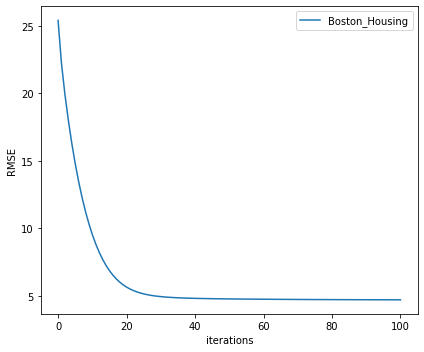

In [92]:
plotting(cost_history,"RMSE","Boston_Housing")

Below is the RMSE of Boston_Housing

In [93]:
print(cost_history[-1])

4.708927667650144


In [94]:
# run gradient descent, create cost function history
weight_history = gradient_descent(least_squares_normalized, w_init, alpha, max_its ,beta)
# use MSE to validate the regression quality
cost_history = [MAD(v) for v in weight_history]

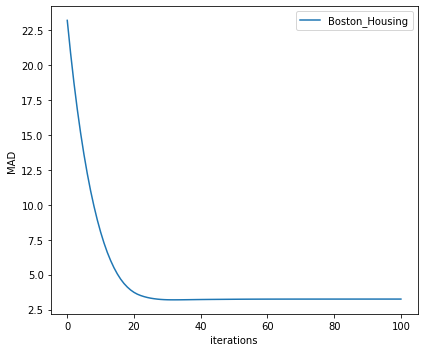

In [95]:
plotting(cost_history,"MAD","Boston_Housing")

Below is the MAD of Boston_Housing

In [96]:
print(cost_history[-1])

3.250402170843036


In [97]:
csvname = "auto_data.csv"
data = np.loadtxt(csvname, delimiter = ',')
data = data.T
x = data[:,:-1]
y = data[:,-1:]

# we do the normalization of these data matrix
x_means = np.mean(x, axis = 0)
x_stds = np.std(x, axis = 0)
# normalize the input data
x_normed = normalize(x, x_means, x_stds)

In [98]:
# initialize parameters
alpha = 10**-4
max_its = 100
beta = 0
w_init = np.random.randn(x.shape[1]+1, 1)

In [99]:
# run gradient descent, create cost function history
weight_history = gradient_descent(least_squares_normalized, w_init, alpha, max_its,beta)
cost_history = [RMSE(v) for v in weight_history]

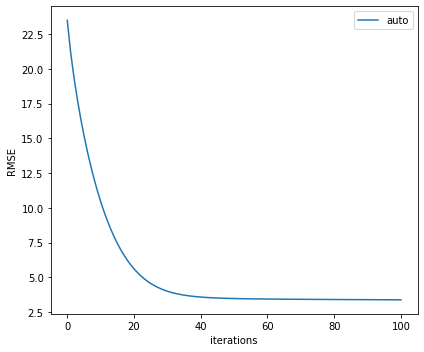

In [100]:
plotting(cost_history, "RMSE","auto")

Below is the RMSE of Auto

In [101]:
print(cost_history[-1])

3.3876054756113096


In [102]:
# run gradient descent, create cost function history
weight_history = gradient_descent(least_squares_normalized, w_init, alpha, max_its ,beta)
# use MSE to validate the regression quality
cost_history = [MAD(v) for v in weight_history]

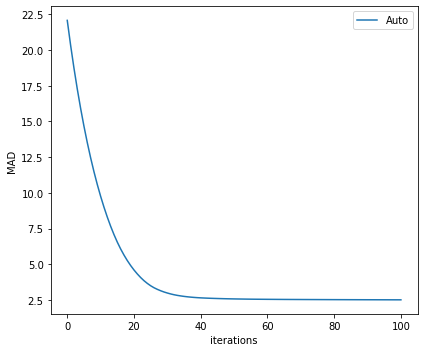

In [103]:
plotting(cost_history,"MAD","Auto")

Below is the MAD of Auto

In [104]:
print(cost_history[-1])

2.5225395243614055


Now we make a conclusion,
In the boston housing, RMSE is 4.70, MAD is 3.75, which is the 1/1000 of the 4500 and 3000 in as the round value in the question, because we do the normalize firstly.
In the Auto data, RMSE is 3.39, MAD is 2.52, compared with the provided 3.3 and 2.5. They are approximating them.

# Problem 5.2 attachment

In [105]:
csvname = "kleibers_law_data.csv"
data = np.loadtxt(csvname, delimiter = ',')
data = data.T
x = data[:,:-1]
y = data[:,-1:]
x = np.log(x)
y = np.log(y)

In [106]:
# define least square cost function
least_squares_normalized = lambda w: np.sum((predict_normalized(x, w) - y)**2)
MSE = lambda w: np.mean((predict_normalized(x, w) - y)**2)

In [107]:
# initialize parameters
alpha = 10**-5
max_its = 500
beta = 0
w_init = np.random.randn(x.shape[1]+1, 1)

In [108]:
# run gradient descent, create cost function history
weight_history = gradient_descent(least_squares_normalized, w_init, alpha, max_its,beta)
cost_history = [MSE(v) for v in weight_history]

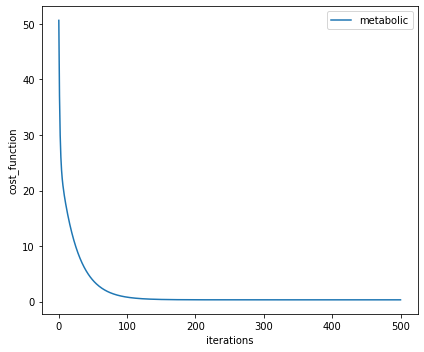

In [109]:
plotting(cost_history,"cost_function","metabolic")

In [110]:
print(weight_history[-1])

[[6.81445075]
 [0.65275719]]


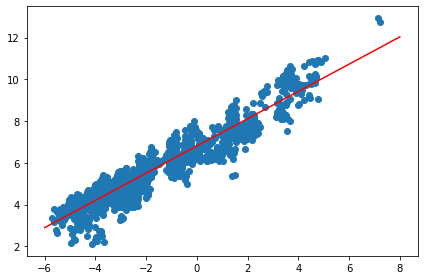

In [111]:
plt.scatter(x,y)
xspace = np.linspace(-6,8,1000)
plt.plot(xspace, weight_history[-1][0]+weight_history[-1][1]*xspace, "r")
plt.savefig("kleibors_law")
plt.show()

In [112]:
# now we find the calories
10**0.65*np.exp(6.81)*1000/4.18

969101.2192923063